In [1]:
!pip install pandas

In [2]:
!pip install keras

In [3]:
!pip install matplotlib

In [4]:
! pip install sklearn

In [5]:
! pip install chart-studio

In [6]:
! pip install xlrd

In [7]:
! pip install statsmodels

In [8]:
#importing packages 
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import statsmodels.api as sm
import itertools
%matplotlib inline
# to remove warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Setting setpoints to make the code reproducible
import tensorflow as tf
tf.random.set_seed(1)


Using TensorFlow backend.


# SARIMA Model

In [9]:
uf = pd.read_excel("Sample - Superstore.xls")

In [10]:
uf.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
df=uf[uf['Category']=='Furniture']

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [13]:
df1=pd.DataFrame(df['Order Date'])
df1['Sales']=df['Sales']
df1 = df1.sort_values('Order Date')

## Indexing with time series data
df1 = df1.set_index('Order Date')

In [14]:
#average sales for every month
sls =df1['Sales'].resample('MS').mean()

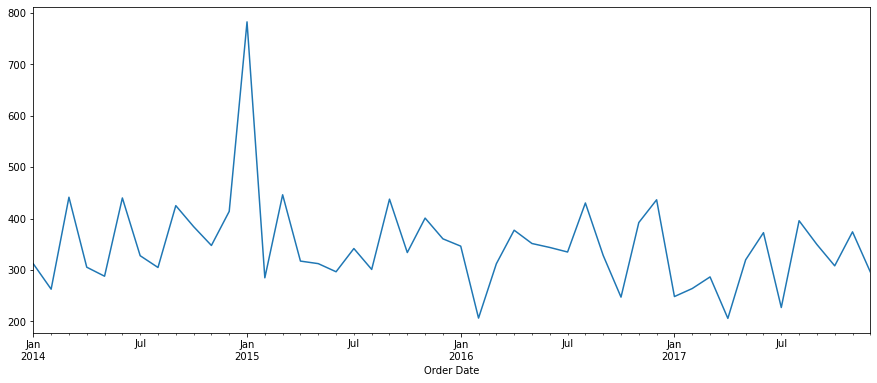

In [15]:
#Vissualizing the time series
sls.plot(figsize=(15, 6))
plt.show()

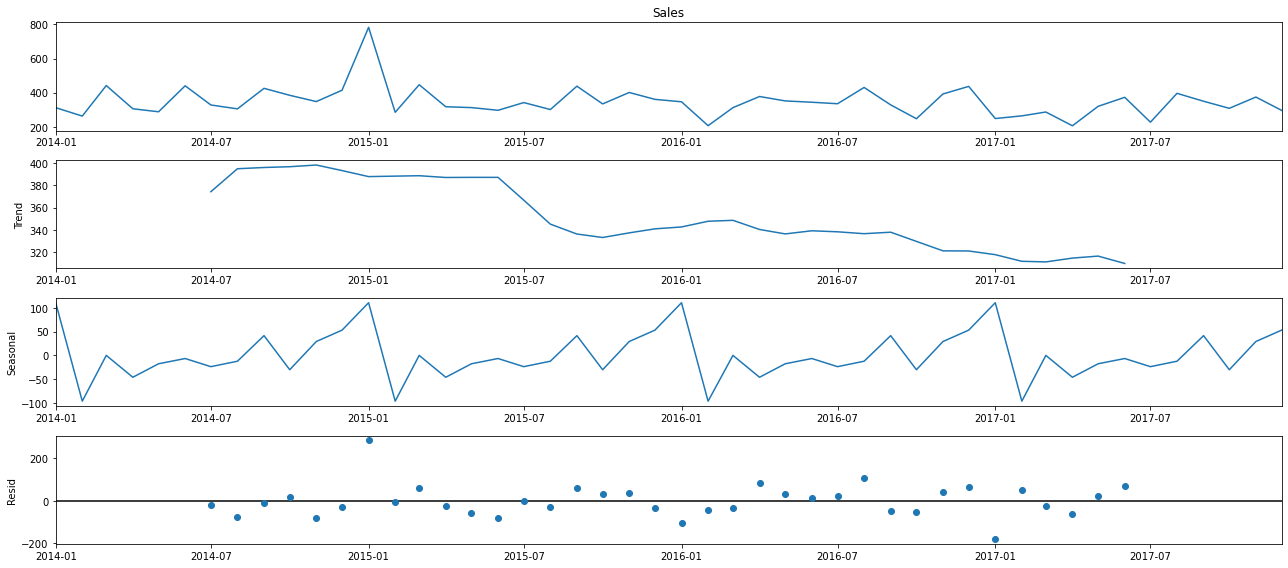

In [16]:
## Decomposing using Pylab
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sls, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
ssnl_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print(' Some Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMA: {} x {}'.format(pdq[1], ssnl_pdq[1]))
print('SARIMA: {} x {}'.format(pdq[1], ssnl_pdq[2]))
print('SARIMA: {} x {}'.format(pdq[2], ssnl_pdq[3]))
print('SARIMA: {} x {}'.format(pdq[2], ssnl_pdq[4]))

 Some Examples of parameter combinations for Seasonal ARIMA...
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [18]:

for prm in pdq:
    for prm_ssnl in ssnl_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sls,
                                            order=prm,
                                            seasonal_order=prm_ssnl,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA Model :{}x{}12 - AIC:{}'.format(prm, prm_ssnl, results.aic))
        except:
                continue


ARIMA Model :(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA Model :(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1324.3661510583115
ARIMA Model :(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.20464898591723
ARIMA Model :(0, 0, 0)x(0, 1, 1, 12)12 - AIC:272.091984762829
ARIMA Model :(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501691
ARIMA Model :(0, 0, 0)x(1, 0, 1, 12)12 - AIC:421.17561100533294
ARIMA Model :(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235
ARIMA Model :(0, 0, 0)x(1, 1, 1, 12)12 - AIC:274.0919845632784
ARIMA Model :(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680665791
ARIMA Model :(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2769.7875462923853
ARIMA Model :(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364603
ARIMA Model :(0, 0, 1)x(0, 1, 1, 12)12 - AIC:262.52305170477035
ARIMA Model :(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.1377175600285
ARIMA Model :(0, 0, 1)x(1, 0, 1, 12)12 - AIC:411.5765686155389
ARIMA Model :(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.44640662502263
ARIMA Model :(0, 0, 1)x(1, 1, 1, 12)12 - AIC:264.52

the best model is (1,1,1)*(0,1,1,12) with AIC 252.66

In [19]:
## Now fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(sls, order=(1, 1, 1),seasonal_order=(0, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1896      0.314     -0.605      0.545      -0.804       0.425
ma.L1         -1.0000      0.439     -2.279      0.023      -1.860      -0.140
ma.S.L12      -0.0684      0.161     -0.426      0.670      -0.383       0.246
sigma2      6417.6755   6.84e-05   9.38e+07      0.000    6417.675    6417.676


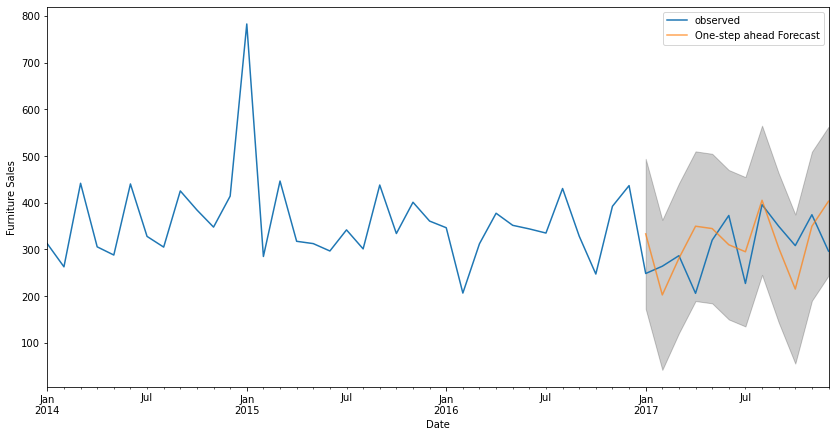

In [20]:
## Validating forecasts
prd = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
prd_ci = prd.conf_int()
ax = sls['2014':].plot(label='observed')
prd.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(prd_ci.index,
                prd_ci.iloc[:, 0],
                prd_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [21]:
## Now calculating the Mean Square Error for the forecast
y_forecasted = prd.predicted_mean
y_actual = sls['2017-01-01':]
mse = ((y_forecasted - y_actual) ** 2).mean()
print('Mean Squared Error of the forecasts is {}'.format(round(mse, 2)))

Mean Squared Error of the forecasts is 5309.78


In [22]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 72.87


## Mixed Layer Perceptron Model 

In [39]:
## Function to split data into test and train sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

In [63]:
# transform list into supervised learning format
def series_supervised(data, n_in=1, n_out=1):
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # combining the values
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    agg.dropna(inplace=True)
    return agg.values

In [64]:
def measure_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

In [65]:
# fit a model
def model_fit(train, config):
    # unpack config
    n_input, n_nodes, n_epochs, n_batch = config
    # prepare data
    data = series_supervised(train, n_in=n_input)
    train_x, train_y = data[:, :-1], data[:, -1]
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # fit
    model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
    return model

In [66]:
# forecast with a pre-fit model
def model_predict(model, history, config):
    # unpack config
    n_input, _, _, _ = config
    # prepare data
    x_input =np. array(history[-n_input:]).reshape(1, n_input)
    # forecast
    yhat = model.predict(x_input, verbose=0)
    return yhat[0]

In [31]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # adding actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error

In [67]:
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    return scores

In [75]:
# summarize model performance
def summarize_scores(name, scores):
    # print a summary
    scores_m, score_std =np.mean(scores), np.std(scores)
    print('The Best possible RMSE IS:{})'.format (scores_m- score_std))
    # box and whisker plot
    plt.boxplot(scores)
    plt.show()

 > 80.945
 > 75.005
 > 78.349
 > 77.241
 > 72.827
 > 74.270
 > 75.519
 > 70.030
 > 76.375
 > 80.532
 > 77.976
 > 76.235
 > 72.558
 > 73.172
 > 65.197
 > 74.158
 > 82.437
 > 71.104
 > 68.358
 > 78.856
 > 78.191
 > 73.627
 > 75.604
 > 69.879
 > 75.739
 > 83.756
 > 69.592
 > 73.536
 > 75.716
 > 70.309
The Best possible RMSE IS:70.7007857156868)


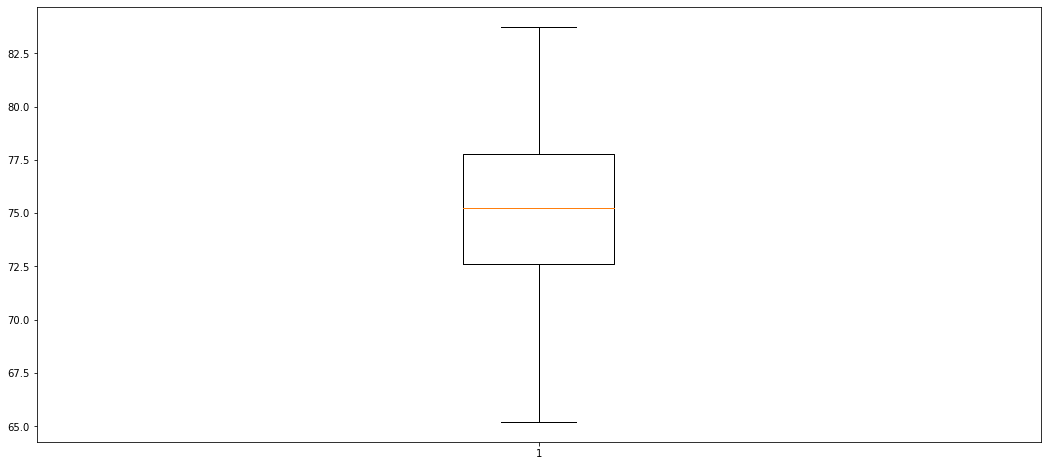

In [76]:
data = sls.values
# data split
n_test = 12
# define config
config = [24, 1000, 100, 100]
# grid search
scores = repeat_evaluate(data, config, n_test)
# summarize scores
summarize_scores('mlp', scores)

# Result

Hence it can be seen that if the right parameteres are used for tuning the MLP model it can give better results compared to the conventional SARIMA model